# CUSTOMER CHURN PREDICTION MODEL

## 1. Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE 
%matplotlib inline
!pip install shap

In [2]:
import sklearn
print(sklearn.__version__)

1.6.1


# 2. Loading the Dataset

In [3]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# 3. EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df.shape

(7043, 21)

In [15]:
df.size

147903

In [16]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df.duplicated().sum()

0

In [19]:
df = df.drop(columns=['customerID'])


In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df['TotalCharges'].dtype

dtype('O')

In [22]:
#conversion of totalcharges to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')


In [23]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
#imputation by taking median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [25]:
df['TotalCharges'].dtype

dtype('float64')

In [26]:
categorical_features=[
"gender",
"SeniorCitizen",
"Partner",            
"Dependents",              
"PhoneService",       
"MultipleLines",    
"InternetService",    
"OnlineSecurity",    
"OnlineBackup",     
"DeviceProtection",    
"TechSupport",     
"StreamingTV",      
"StreamingMovies",   
"Contract",     
"PaperlessBilling",  
"PaymentMethod"]

numerical_features=["tenure","MonthlyCharges","TotalCharges"]   

### Checking class distribution of  target column

In [27]:
print (df['Churn'].value_counts())
#imbalanced data

Churn
No     5174
Yes    1869
Name: count, dtype: int64


### Numerical Features -Analysis

In [28]:
df.skew(numeric_only=True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

In [29]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


In [30]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

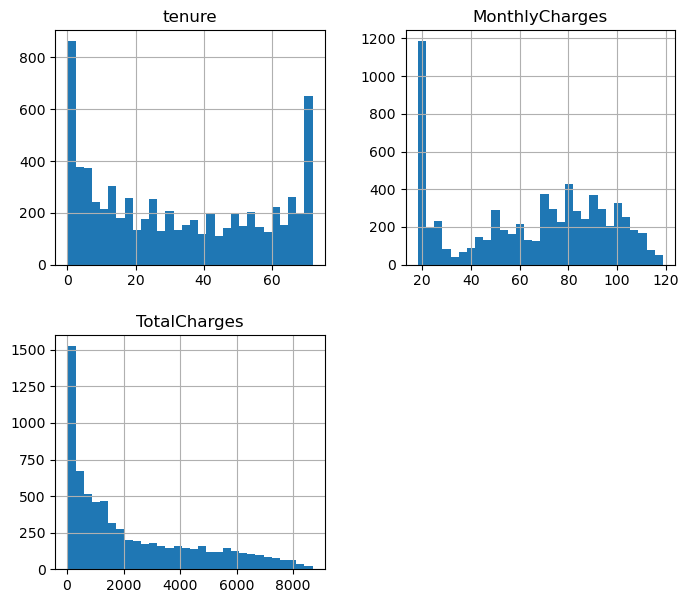

In [31]:
df[numerical_features].hist(bins=30,figsize=(8,7))

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

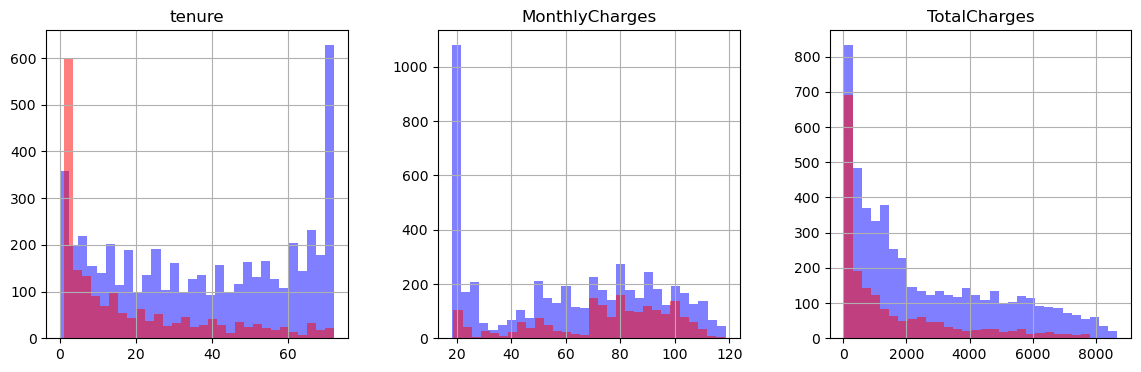

In [32]:
fig,ax=plt.subplots(1,3,figsize=(14,4))
df[df.Churn=='No'][numerical_features].hist(bins=30,color="blue",alpha=0.5,ax=ax)
df[df.Churn=='Yes'][numerical_features].hist(bins=30,color="red",alpha=0.5,ax=ax)

In [33]:

def plot_histogram(df, column_name):
    
    print(f"Plotting histogram for column: {column_name}")

    plt.figure(figsize=(5, 3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

    # Calculate mean and median
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    
    # Add vertical lines
    plt.axvline(col_mean, color='red', linestyle='--', label='Mean')
    plt.axvline(col_median, color='green', linestyle='-', label='Median')

   
    plt.legend()
    plt.show()



Plotting histogram for column: tenure


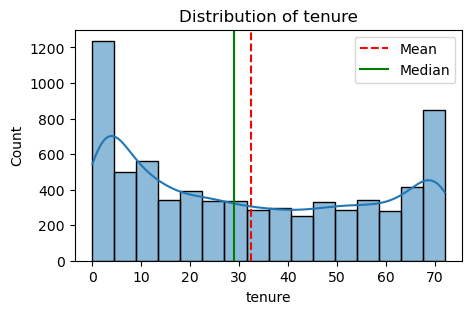

In [34]:
plot_histogram(df, "tenure")

plot_histogram(df, "MonthlyCharges")

Plotting histogram for column: TotalCharges


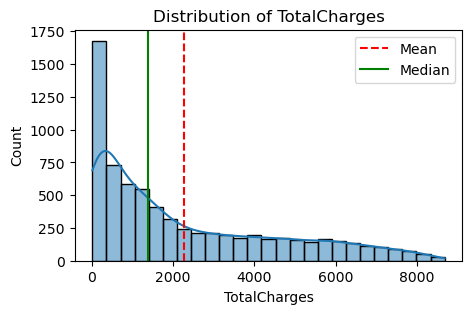

In [35]:
plot_histogram(df, "TotalCharges")

### Box plot for numerical features

In [36]:

def plot_boxplot(df, column_name):
    
    print(f"Plotting histogram for column: {column_name}")

    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Box plot  of {column_name}")

    plt.ylabel(column_name)
    plt.show


Plotting histogram for column: tenure


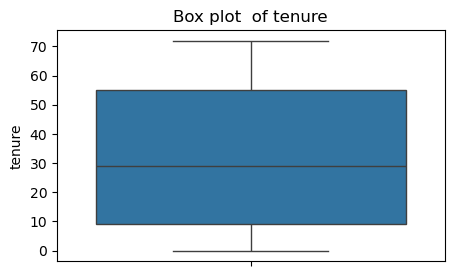

In [37]:
plot_boxplot(df,'tenure')

Plotting histogram for column: TotalCharges


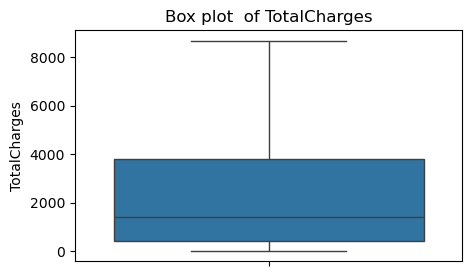

In [38]:
plot_boxplot(df,'TotalCharges')

Plotting histogram for column: MonthlyCharges


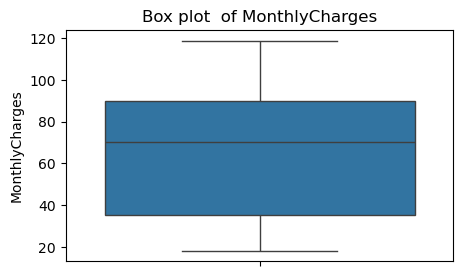

In [39]:
plot_boxplot(df,'MonthlyCharges')

### Correlation Heatmap for numerical columns 

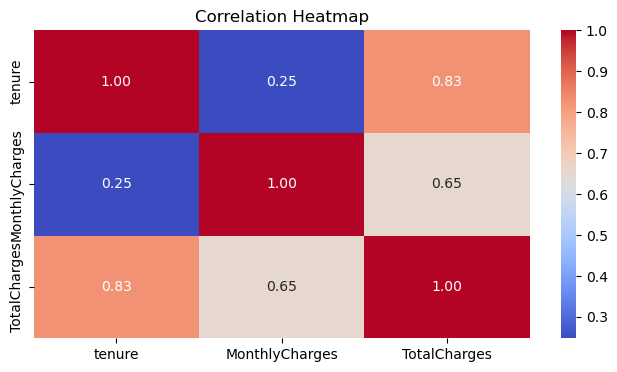

In [40]:
plt.figure(figsize=(8,4))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Categorical Features - Analysis

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


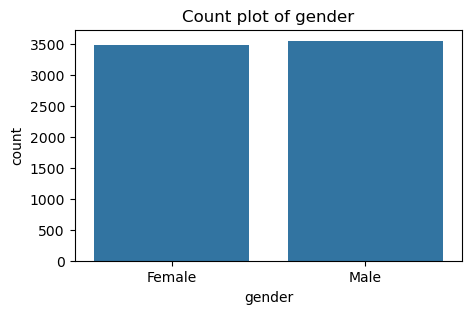

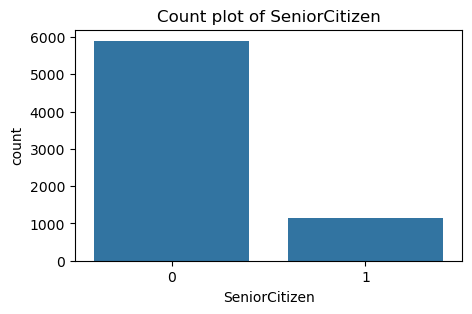

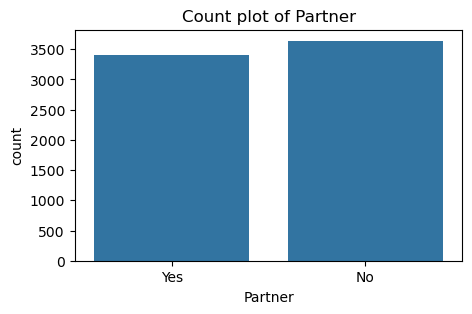

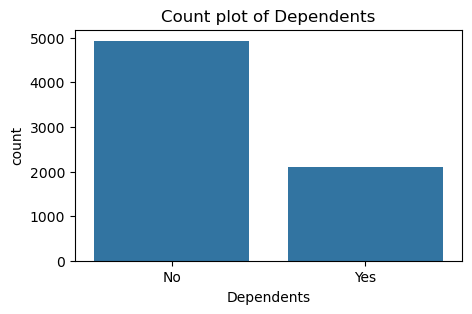

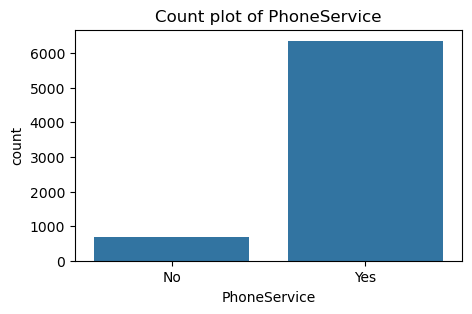

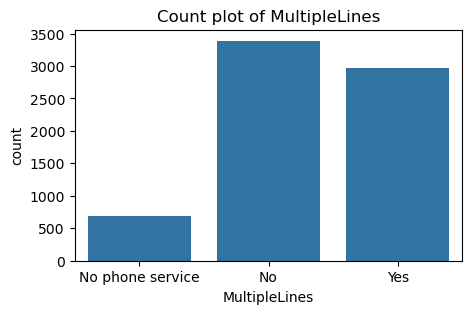

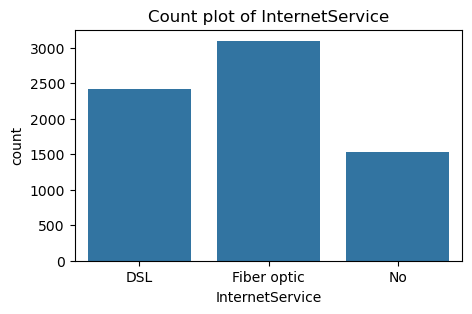

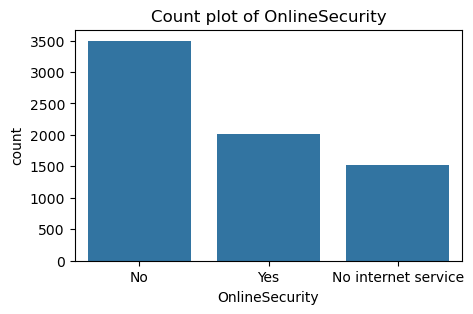

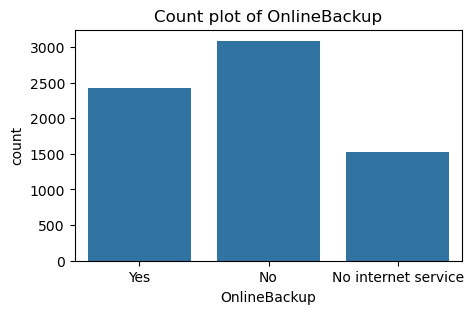

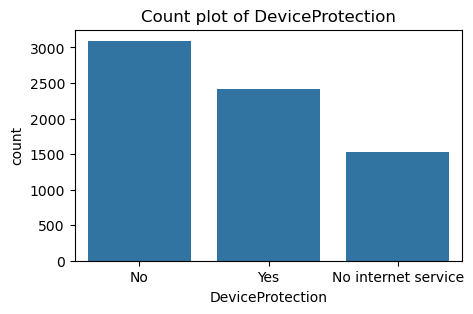

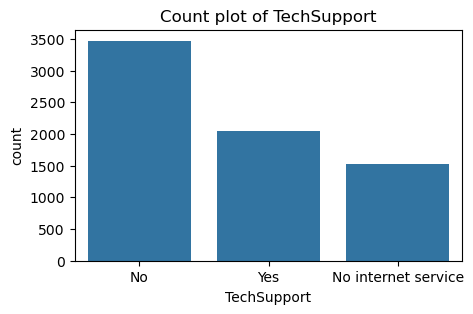

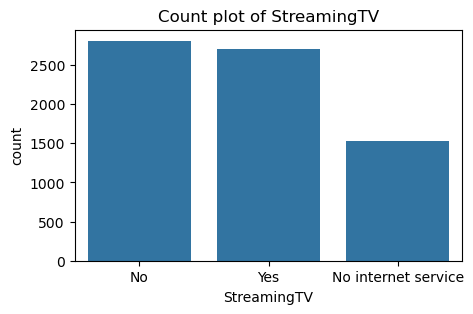

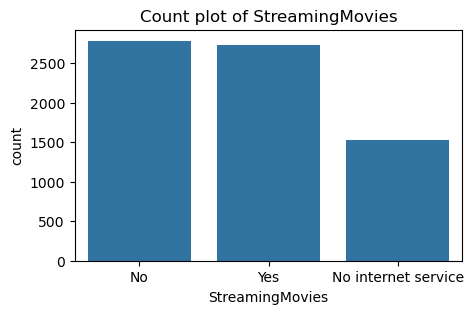

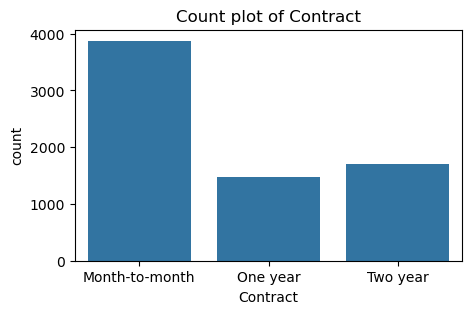

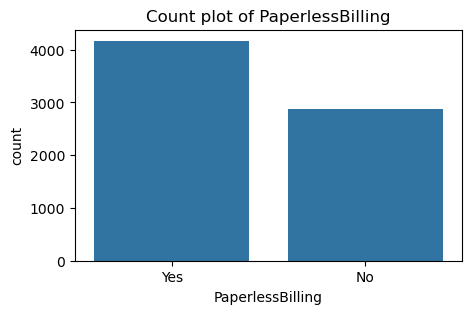

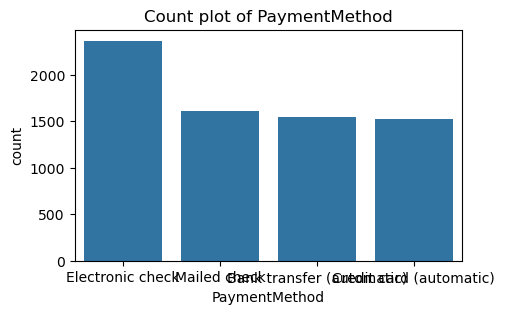

In [42]:
for col in categorical_features:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"Count plot of {col}")
    plt.show()

# 4. Data Preprocessing

In [43]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### Label Encoding for cateogrical features

In [44]:
unique_values = df['Contract'].unique()

print(unique_values)

['Month-to-month' 'One year' 'Two year']


In [45]:
df_encoded = df.copy()
label_encoders = {}

for col in categorical_features:
    if col != "Churn":  # Exclude the target column
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le




In [101]:
with open("label_encodersfinal.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

In [47]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


In [48]:
# Encode target column separately (if it's categorical)
df_encoded["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})  # Adjust mapping as needed

In [49]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [50]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Splitting the training and testing data

In [51]:
#splitting the features and target
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(y_train.shape)

In [52]:
 print(y_train.value_counts())

Churn
0    4139
1    1495
Name: count, dtype: int64


### Synthetic Minority OverSampling Technique (SMOTE)

In [53]:
#we apply smote after splitting 
#smote doesnt work with missing values
smote = SMOTE(random_state=42)


In [54]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [55]:
 print(y_train_resampled.value_counts())

Churn
0    4139
1    4139
Name: count, dtype: int64


In [65]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Standard Scaling for Logistic Regression model 

# 5. Feature Selection 


Optimal number of features: 19
Selected Features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


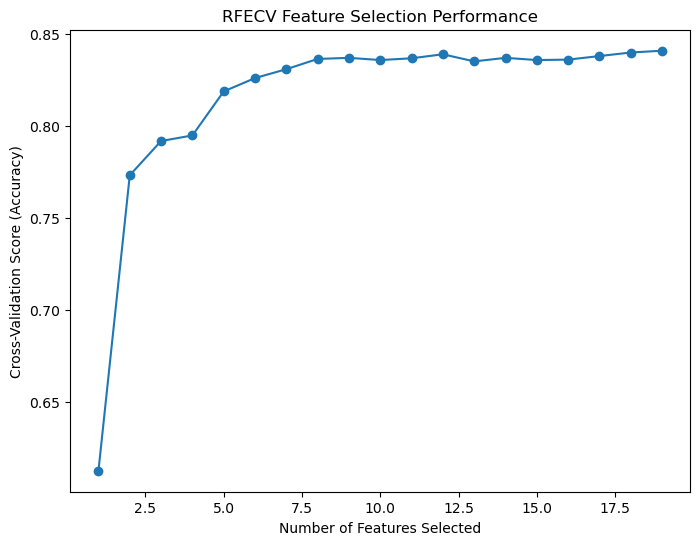

In [86]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Initialize RandomForest as the base model for RFECV
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# RFECV with cross-validation
rfecv = RFECV(
    estimator=rf, 
    step=1,  # Remove one feature at a time
    cv=StratifiedKFold(n_splits=5),  # 5-Fold Cross Validation
    scoring='accuracy',  # Score based on accuracy
    n_jobs=-1
)

# Fit RFECV on training data
rfecv.fit(X_train_resampled, y_train_resampled)

# Get selected features
selected_features = X_train_resampled.columns[rfecv.support_]
print("Optimal number of features:", rfecv.n_features_)
print("Selected Features:", list(selected_features))

# Transform dataset to keep only selected features
X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

# Plot feature selection results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),rfecv.cv_results_['mean_test_score'] , marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score (Accuracy)")
plt.title("RFECV Feature Selection Performance")
plt.show()


In [88]:
# Save selected features
with open("selected_featuresfinal.pkl", "wb") as file:
    pickle.dump(list(selected_features), file)

print("✅ Selected features saved!")


✅ Selected features saved!


# 5. Model Training


## Training with default hyperparameters

In [89]:
# Scale data only for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [105]:

# Save the scaler
with open("scaler2.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("✅ scaler2.pkl saved!")


✅ scaler2.pkl saved!


In [90]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}


In [122]:
# Perform 5-fold cross-validation and store results
cv_scores = {}

for model_name, model in models.items():
    print(f"Training {model_name} with cross-validation...")
    
    # Use scaled features only for Logistic Regression
    if model_name == "Logistic Regression":
        X_train_final = X_train_scaled  # Use scaled features for Logistic Regression
    else:
        X_train_final = X_train_selected  # Use selected features for other models
    
    # Perform cross-validation
    scores = cross_val_score(model, X_train_final, y_train_resampled, cv=5, scoring="roc_auc")  # Use 'roc_auc' for scoring
    cv_scores[model_name] = scores
    
    print(f"{model_name} Mean AUC-ROC: {np.mean(scores):.4f}")
    print("-" * 70)

# Display cross-validation results
cv_scores

Training Logistic Regression with cross-validation...
Logistic Regression Mean AUC-ROC: 0.8808
----------------------------------------------------------------------
Training Decision Tree with cross-validation...
Decision Tree Mean AUC-ROC: 0.8666
----------------------------------------------------------------------
Training Random Forest with cross-validation...
Random Forest Mean AUC-ROC: 0.9038
----------------------------------------------------------------------
Training XGBoost with cross-validation...


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:59:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:59:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:59:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:59:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

XGBoost Mean AUC-ROC: 0.9318
----------------------------------------------------------------------


{'Logistic Regression': array([0.82920109, 0.8310331 , 0.92249309, 0.91091571, 0.91011397]),
 'Decision Tree': array([0.82311795, 0.82046328, 0.91666521, 0.88485387, 0.88780675]),
 'Random Forest': array([0.8522836 , 0.86178499, 0.94159213, 0.93158804, 0.93185383]),
 'XGBoost': array([0.85329004, 0.87153069, 0.98014685, 0.97854783, 0.97548689])}

In [92]:
cv_scores

{'Logistic Regression': array([0.75301932, 0.74939614, 0.84359903, 0.8223565 , 0.80785498]),
 'Decision Tree': array([0.73671498, 0.74396135, 0.84601449, 0.82356495, 0.80845921]),
 'Random Forest': array([0.76268116, 0.76992754, 0.86956522, 0.85317221, 0.83685801]),
 'XGBoost': array([0.73248792, 0.75181159, 0.89915459, 0.89063444, 0.87794562])}

# 6. Model Selection

In [93]:
# XGBoost has the highest accuracy 

In [94]:
from xgboost import XGBClassifier




xgb = XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric="logloss",
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200
)
xgb.fit(X_train_resampled, y_train_resampled)


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:26:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [95]:
 print(y_test.value_counts())

Churn
0    1035
1     374
Name: count, dtype: int64


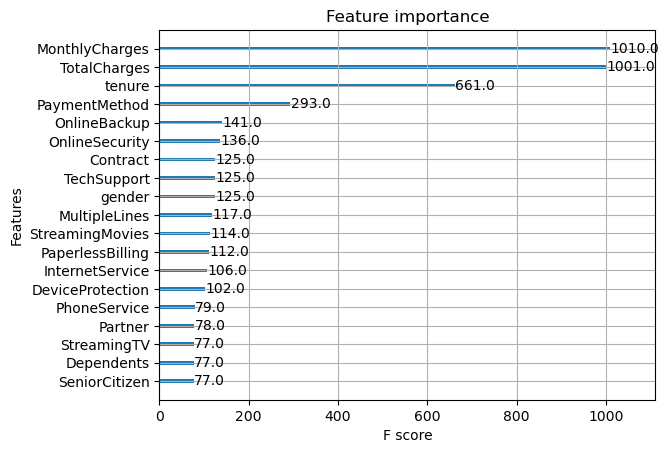

In [96]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb)
plt.show()


# 8. HyperParameter Tuning

In [97]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Perform feature selection using RFECV with Random Forest
rfecv = RFECV(estimator=RandomForestClassifier(random_state=42), step=1, cv=5, scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train_resampled, y_train_resampled)

# Get selected features
selected_features = X_train_resampled.columns[rfecv.support_]

# Apply feature selection to training and test sets
X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

# Print selected features
print("Selected Features:", list(selected_features))

# Define parameter grid for XGBoost tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize XGBoost classifier
xgb = XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric="logloss"
)

# Perform Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',  # Change to AUC for imbalanced datasets
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit model on selected features
random_search.fit(X_train_selected, y_train_resampled)

# Print the best parameters
print("Best Parameters from Randomized Search:", random_search.best_params_)


Selected Features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:27:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:27:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:27:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:27:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

Best Parameters from Randomized Search: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.9}


In [120]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define a refined grid around the best parameters from RandomizedSearchCV
param_grid_fine = {
    'n_estimators': [150, 200, 250],  # Around the best value 200
    'max_depth': [6, 7, 8],  # Around 7
    'learning_rate': [0.08, 0.1, 0.12],  # Around 0.1
    'subsample': [0.7, 0.8, 0.9],  # Around 0.8
    'colsample_bytree': [0.7, 0.8, 0.9]  # Around 0.8
}

# Initialize XGBoost classifier
xgb_final = XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric="logloss"
)

# Perform Grid Search CV
grid_search = GridSearchCV(
    estimator=xgb_final,
    param_grid=param_grid_fine,
    scoring='roc_auc',  # Change to 'roc_auc' for imbalanced datasets
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV on selected features
grid_search.fit(X_train_selected, y_train_resampled)


print("Best Parameters from Grid Search:", grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:57:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:57:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:57:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:57:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

Best Parameters from Grid Search: {'colsample_bytree': 0.7, 'learning_rate': 0.08, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.9}


In [99]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Best XGBoost model from Grid Search
best_xgb = random_search.best_estimator_

# Initialize models with best parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42),
    "XGBoost": best_xgb  # Best XGBoost model
}

# Store results
evaluation_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_selected, y_train_resampled)
    
    # Predictions
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    # Store results
    evaluation_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc_roc
    }
    
    print(f"\n{name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Convert results into a DataFrame for easy comparison
evaluation_df = pd.DataFrame(evaluation_results).T
print("\nModel Comparison:\n", evaluation_df)



Training Logistic Regression...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Model Evaluation:
Accuracy: 0.7537
Precision: 0.5263
Recall: 0.7219
F1 Score: 0.6088
AUC-ROC: 0.8225218941331472

Confusion Matrix:
[[792 243]
 [104 270]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.53      0.72      0.61       374

    accuracy                           0.75      1409
   macro avg       0.71      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409


Training Decision Tree...

Decision Tree Model Evaluation:
Accuracy: 0.7686
Precision: 0.5548
Recall: 0.6497
F1 Score: 0.5985
AUC-ROC: 0.8110607352295331

Confusion Matrix:
[[840 195]
 [131 243]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1035
           1       0.55      0.65      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73 

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:32:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model Evaluation:
Accuracy: 0.7807
Precision: 0.5802
Recall: 0.6283
F1 Score: 0.6033
AUC-ROC: 0.8209214911260947

Confusion Matrix:
[[865 170]
 [139 235]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.58      0.63      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.73      1409
weighted avg       0.79      0.78      0.78      1409


Model Comparison:
                      Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression  0.753726   0.526316  0.721925  0.608794  0.822522
Decision Tree        0.768630   0.554795  0.649733  0.598522  0.811061
Random Forest        0.761533   0.538618  0.708556  0.612009  0.833807
XGBoost              0.780696   0.580247  0.628342  0.603338  0.820921


In [100]:
import pickle

# Define the file name
model_filename = "xgboost_modelfinal.pkl"

# Save the model
with open(model_filename, "wb") as file:
    pickle.dump(best_xgb, file)

print(f"✅ XGBoost model saved as '{model_filename}'")


✅ XGBoost model saved as 'xgboost_modelfinal.pkl'


# 8. Model Prediction

In [115]:
import pickle
import pandas as pd

# Load the trained XGBoost model
with open("xgboost_modelfinal.pkl", "rb") as file:
    model = pickle.load(file)

# Load the selected features from RFECV
with open("selected_featuresfinal.pkl", "rb") as file:
    selected_features = pickle.load(file)

# Load the label encoders for categorical features (if used)
try:
    with open("label_encodersfinal.pkl", "rb") as file:
        label_encoders = pickle.load(file)
    encoding_used = True
except FileNotFoundError:
    encoding_used = False  # No encoding was used


In [116]:
 # Example new data (replace with actual input)
new_data = pd.DataFrame({
    'gender': ['Female'],
    'SeniorCitizen': [0],
    'Partner': ['Yes'],
    'Dependents': ['No'],
    'tenure': [12],
    'PhoneService': ['Yes'],
    'MultipleLines': ['No'],
    'InternetService': ['DSL'],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['Yes'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'StreamingTV': ['No'],
    'StreamingMovies': ['No'],
    'Contract': ['Month-to-month'],
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Electronic check'],
    'MonthlyCharges': [29.85],
    'TotalCharges': [358.2]
})


In [117]:
# Convert 'TotalCharges' to numeric
new_data['TotalCharges'] = pd.to_numeric(new_data['TotalCharges'], errors='coerce')

# Fill missing values in 'TotalCharges' with the median
new_data['TotalCharges'].fillna(new_data['TotalCharges'].median(), inplace=True)

# Apply Label Encoding (if used during training)
if encoding_used:
    for col in label_encoders:
        if col in new_data.columns:
            new_data[col] = label_encoders[col].transform(new_data[col])

# Ensure the new data has the same feature columns as the trained model
missing_cols = set(selected_features) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0  # Add missing columns with default value 0

# Reorder columns to match training data
new_data = new_data[selected_features]


In [119]:
# Predict class (0 or 1)
predicted_class = model.predict(new_data)[0]  

# Predict class probabilities
probabilities = model.predict_proba(new_data)[0]  

# Extract probability of positive class (e.g., "Churn" if it's a classification problem)
positive_class_prob = probabilities[1]

# Display results
print("\n✅ Prediction Results:")
print(f"🔹 Predicted Class: {predicted_class}")
print(f"🔹 Probability of Class 0: {probabilities[0]:.4f}")
print(f"🔹 Probability of Class 1: {probabilities[1]:.4f}")

# Interpret prediction
if predicted_class == 1:
    print("\n🚨 Alert: The model predicts that the customer is likely to churn!")
else:
    print("\n✅ Good news: The model predicts that the customer will stay!")



✅ Prediction Results:
🔹 Predicted Class: 0
🔹 Probability of Class 0: 0.7949
🔹 Probability of Class 1: 0.2051

✅ Good news: The model predicts that the customer will stay!
